In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
cd 'INFR11062'

[Errno 2] No such file or directory: 'INFR11062'
/Users/jusjosgra/uni/MT/INFR11062


In [72]:
%run nmt_translate.py

vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.model
--------------------------------------------------
Existing model found
--------------------------------------------------
loading model ...
finished loading: model/seq2seq_10000sen_1-1layers_100units_ja_en_exp1_NO_ATTN.model
--------------------------------------------------


In [73]:
_ = predict(s=1000,num=10)

English predictions, s=1000, num=10:
--------------------------------------------------
Src | 愚者 の あと 知恵 。                                                                    
Ref | it is easy to be wise after the event .                                         
Hyp | i &apos;s _UNK _UNK . . _EOS                                                    
--------------------------------------------------
precision | 0.1429
recall | 0.1000
--------------------------------------------------
Src | その 男 は 地面 に 倒れ た 。                                                              
Ref | the man fell down on the ground .                                               
Hyp | the the _UNK on the the . . _EOS                                                
--------------------------------------------------
precision | 0.4444
recall | 0.5000
--------------------------------------------------
Src | 決勝 戦 で 負け る ほど 悔し い もの は な い 。                                                  
Ref | nothing is more disappo

In [74]:
_ = predict(s=0, num=10)

English predictions, s=0, num=10:
--------------------------------------------------
Src | ステーキ は 中位 で 焼 い て くださ い 。                                                       
Ref | i like my steak medium .                                                        
Hyp | please the the the the . . _EOS                                                 
--------------------------------------------------
precision | 0.1250
recall | 0.1667
--------------------------------------------------
Src | 彼女 の 美し さ に 関 し て は 、 疑 う 余地 が な い 。                                            
Ref | there is no doubt as to her beauty .                                            
Hyp | there is no to her her her . . _EOS                                             
--------------------------------------------------
precision | 0.6000
recall | 0.6667
--------------------------------------------------
Src | この 近所 の 家 は どれ も とても よく 似 て い る の で 見分け が つ か な い 。                             
Ref | all the houses in this nei

In [75]:
_ = predict(s=10000, num=10, r_filt=.5)

English predictions, s=10000, num=10:
--------------------------------------------------
Src | 彼 は ドイツ 生まれ の 人 だ 。                                                             
Ref | he is a german by origin .                                                      
Hyp | he is a of of . . _EOS                                                          
--------------------------------------------------
precision | 0.5000
recall | 0.5714
sentences matching filter = 1


In [76]:
filename_en = 'Data/text.en'
filename_jp = 'Data/text.fr'

In [77]:
def get_sentence_lengths(filename):

    lines = [line.rstrip('\n') for line in open(filename)]


    sent_len = []

    for i in range(0,len(lines)):
        x = len(lines[i].split()) - 1
        sent_len.append(x)
        
    return sent_len

In [78]:
sent_len_en = get_sentence_lengths(filename_en)
sent_len_jp = get_sentence_lengths(filename_jp)

In [79]:
dims = (10,6)

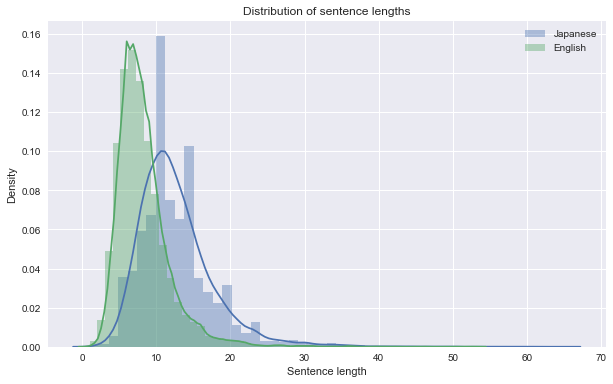

In [80]:
fig, ax = plt.subplots(figsize=dims)
sns.distplot(sent_len_jp, ax=ax, label='Japanese')
sns.distplot(sent_len_en, ax=ax, label='English')
plt.title('Distribution of sentence lengths')
ax.set(xlabel='Sentence length', ylabel='Density')
plt.legend()
plt.savefig('/Users/jusjosgra/uni/MT/plots/dist.pdf')

In [81]:
np.corrcoef(sent_len_jp,sent_len_en)

array([[1.        , 0.76626682],
       [0.76626682, 1.        ]])

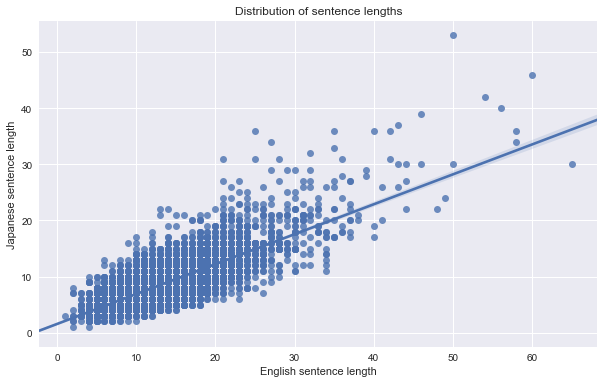

In [82]:
sns.regplot(np.array(sent_len_jp), np.array(sent_len_en))
plt.xlabel('English sentence length')
plt.ylabel('Japanese sentence length')
plt.title('Distribution of sentence lengths')
plt.savefig('/Users/jusjosgra/uni/MT/plots/corr.pdf')

In [83]:
filename = filename_en

lines = [line.rstrip('\n') for line in open(filename)]


sents = []

for i in range(0,len(lines)):
    x = lines[i].split()
    sents = sents + x

In [84]:
len(sents)

97643

In [85]:
len(np.unique(sents))

7211

In [86]:
filename = filename_jp

lines = [line.rstrip('\n') for line in open(filename)]


sents = []

for i in range(0,len(lines)):
    x = lines[i].split()
    sents = sents + x

In [87]:
len(sents)

143580

In [88]:
len(np.unique(sents))

8251

In [89]:
unique_elements, counts_elements = np.unique(sents, return_counts=True)

In [90]:
len(counts_elements[counts_elements == 1])

4171

## Training models

In [59]:
# baseline
!./run_exp

Running mt experiment
Could not find conda environment: mtenv
You can list all discoverable environments with `conda info --envs`.

/Users/jusjosgra/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Japanese English dataset configuration
vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_1-1layers_100units_baseline_NO_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_1-1layers_100units_baseline_NO_ATTN.model
--------------------------------------------------
Existing model not found!
--------------------------------------------------
epoch=1, iter=10000, loss=6.428413, mean loss=6.038288

In [61]:
compute_dev_bleu()

100%|██████████| 500/500 [00:14<00:00, 34.26it/s]


BLEU: 14.470


14.46960011513064

In [94]:
# q2 exp1 2 enc 3 dec
!./run_exp

Running mt experiment
/Users/jusjosgra/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Japanese English dataset configuration
vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_2-3layers_100units_q3_attn_test_SOFT_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_2-3layers_100units_q3_attn_test_SOFT_ATTN.model
--------------------------------------------------
Existing model not found!
--------------------------------------------------
epoch=1, iter=0, loss=0.000000, mean loss=0.000000:   0%| | 0/10000 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "nmt_translate.py", line 

In [66]:
compute_dev_bleu()

100%|██████████| 500/500 [00:17<00:00, 28.39it/s]


BLEU: 14.470


14.46960011513064

In [68]:
model